In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification



In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

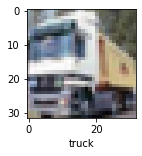

In [8]:
plot_sample(X_train,y_train,1)

Normalizing the training data

In [9]:
X_train=X_train/255.0
X_test=X_test/255.0

Build simple artificial neural network for image classification

In [11]:
ann=models.Sequential([
                      layers.Flatten(input_shape=(32,32,3)),
                      layers.Dense(3000,activation='relu'),
                      layers.Dense(1000,activation='relu'),
                      layers.Dense(10,activation='sigmoid')])
ann.compile(optimizer='SGD',
            loss="sparse_categorical_crossentropy",
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.9251 - accuracy: 0.3056
Epoch 2/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.6448 - accuracy: 0.4203
Epoch 3/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.5590 - accuracy: 0.4479
Epoch 4/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.4947 - accuracy: 0.4697
Epoch 5/5
1563/1563 [==============================] - 107s 69ms/step - loss: 1.4329 - accuracy: 0.4980


In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.54      0.54      1000
           1       0.72      0.46      0.56      1000
           2       0.28      0.57      0.38      1000
           3       0.40      0.26      0.31      1000
           4       0.40      0.31      0.35      1000
           5       0.56      0.21      0.31      1000
           6       0.43      0.68      0.53      1000
           7       0.55      0.55      0.55      1000
           8       0.63      0.61      0.62      1000
           9       0.56      0.57      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



**convolutional neural network to train our images**

In [15]:
cnn= models.Sequential([
                        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                        layers.MaxPooling2D((2,2)),

                        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                        layers.MaxPooling2D((2,2)),

                        layers.Flatten(),
                        layers.Dense(64, activation='relu'),
                        layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [17]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.7254 - accuracy: 0.3743
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1767 - accuracy: 0.5867
Epoch 3/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.0190 - accuracy: 0.6465
Epoch 4/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9361 - accuracy: 0.6775
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8653 - accuracy: 0.7009
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8184 - accuracy: 0.7155
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7674 - accuracy: 0.7358
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7250 - accuracy: 0.7508
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6785 - accuracy: 0.7617
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9484 - accuracy: 0.6851


[0.9483908414840698, 0.6851000189781189]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.02913319e-02, 4.28842730e-04, 7.30901118e-03, 8.04442644e-01,
        2.23882240e-03, 3.78804095e-02, 1.02097429e-01, 8.11387377e-04,
        1.42662544e-02, 2.33903411e-04],
       [2.80707900e-04, 1.36817992e-02, 1.62396816e-08, 4.47568276e-08,
        6.50187126e-10, 1.28233091e-09, 3.04035130e-11, 9.59500479e-10,
        9.85949039e-01, 8.83392713e-05],
       [3.13031636e-02, 3.44589174e-01, 5.41779504e-04, 2.42565502e-03,
        2.35980377e-04, 5.34040628e-05, 1.48414456e-05, 4.40908887e-04,
        6.13198698e-01, 7.19637424e-03],
       [8.10664415e-01, 8.53969995e-03, 3.08552105e-03, 4.66133097e-05,
        1.67129487e-02, 1.14299428e-06, 6.13798557e-06, 7.07483059e-06,
        1.60770804e-01, 1.65540885e-04],
       [1.83736411e-05, 2.58129512e-05, 4.52561397e-03, 1.10835945e-02,
        8.51364970e-01, 1.15844316e-03, 1.31666824e-01, 8.73552344e-05,
        6.87942374e-05, 1.73254165e-07]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

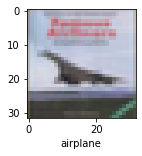

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'airplane'